# Unsupervised Learning

See Chapter 9 of "Hands on Machine Learning with Scikit-learn,  Keras and Tensorflow" by Geron,   O'Reily press

Updated 1/18/2023


## Unsupervised Learning is about understanding the structure of data without having labeled outcomes.

Geron talks about a number of different types of unsupervised learning activities


Dimensionality Reduction-  which we have seen with PCA, and NMDS,  either for visualization, anomaly detection or variable reduction

Visualization- ways of illustrating relationships in large data sets,  PCA, NMDS, relationship graphs

Anomaly Detection- which we have already seen a bit of

Clustering- grouping similar instances into clusters, or groups.

Density Estimation-  Trying to estimated the probability density function (pdf) that gave rise to the observed data

## Clustering

Gathering like objects into groupings or clusters without an group labels.   This may be useful for market segmentation,  customer groupings,  understanding 
political divisions, recommender systems, search engines, image segmentation,  dimensionality reduction etc

It can be based on either variables,   derived variables (ie PCA components) or on distances between specimens

Note: Clustering dates back a long way.  There are a number of problems with classical approaches (pre 1985 or so) approaches to cluster analysis.   In early methods,   one set up a matrix of pairwise distances between specimens.   The two closest specimens were then joined into a node of the tree. 

The problem is how to compute the distance from the node to the other specimens in the data set,  since after joing the closest two specimens,   we need to join the next two closest specimens to other specimens, or perhaps to the nodes as we create them.  To do that, we need the distance from specimens to the node.

A "link function" is used to compute the distance from specimens to the node.   The problem is that there are many possible link functions and changing the link functions greatly alters the cluster diagram.  There is no way to decide which link function is the right one to use,  it is fundamentally a matter of opinion.

We will not be covering this class of clustering algorithm,  we will move to more recent cluster methods that don't require a link function.

In my own scientific work,   I always insisted on using NMDS alongside cluster analysis,  when my colleagues insisted on cluster analysis,   as NMDS shows the same patterns with no link function needed.

Just be aware if you look at older work in the social sciences that these earlier forms of cluster analysis were commmonly used.

## K Means Clustering

We will look at this method using the Iris data set


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# we can set the random seed here so we get uniform results
np.random.seed(5)

iris=datasets.load_iris()
X=iris.data
y=iris.target

# probably a really good idea to standardize data in a k-means, so all directions are in the same units

scaler=StandardScaler()
X=scaler.fit_transform(X)

In [2]:
# We will start by looking at a system with k=3 clusters

k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [3]:
# the method estimates the centroid of the clusters and then assigns each specimen to a cluster
# 

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [4]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

(-3.0, 3.0)

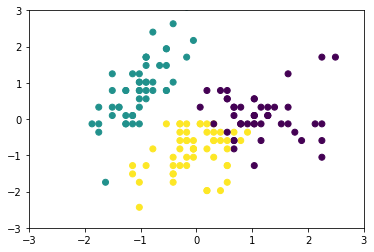

In [5]:
# plot X1, X2 with color mapping using y_pred

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.ylim(-3,3)
plt.xlim(-3,3)

In [6]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor=Voronoi(kmeans.cluster_centers_[:,0:2])

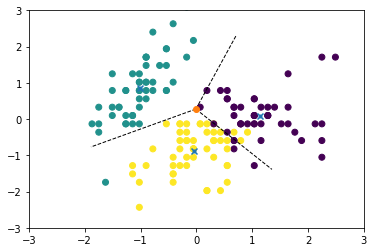

In [7]:

fig=voronoi_plot_2d(vor)
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker="x")

In [8]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

points_0 = X[(y_pred==0),0:2]  
hull_0 = ConvexHull(points_0)
points_1 = X[(y_pred==1),0:2]  
hull_1 = ConvexHull(points_1)
points_2 = X[y_pred==2,0:2]  
hull_2 = ConvexHull(points_2)



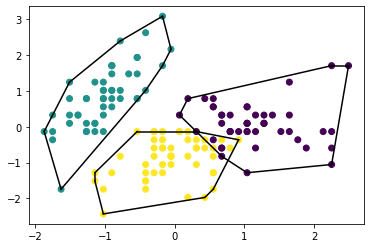

In [9]:
plt.scatter(X[:,0], X[:,1], c=y_pred)

for simplex in hull_0.simplices:
    plt.plot(points_0[simplex, 0], points_0[simplex, 1], 'k-')

for simplex in hull_1.simplices:
    plt.plot(points_1[simplex, 0], points_1[simplex, 1], 'k-')

for simplex in hull_2.simplices:
    plt.plot(points_2[simplex, 0], points_2[simplex, 1], 'k-')    

### Soft clustering

THis approach computes a distance for each specimen to each mean location,  instead of assigning specimens to a category

One could use these distances as variables in a model

Note that we used kmeans.predict to get the hard coding (cluster membership)

In [10]:
temp=kmeans.transform(X)
temp[0:5,:]

array([[3.98940603, 0.21295824, 3.12119834],
       [4.01793312, 0.99604549, 2.6755083 ],
       [4.19343668, 0.65198444, 2.97416665],
       [4.19784749, 0.9034561 , 2.88014429],
       [4.11157152, 0.40215457, 3.30022609]])

### Kmeans algorithm

1.) pick k specimens as the centroids of the k clusters,  the specimens farthest from each other are often used here, to reduce convergence on suboptimal solutions

2.) assign all specimens to one of the k groups, based on the nearest group centroid

3.) Recalcuate the centroids

4.) Go to step 2 and repeat, until there is no change in the calculated centroids

This will converge, but it may converge to a local minima rather than the optimal minima

You can run the algorithm with a n_init hyperparameter tha controls the number of distinct starting positions used.

There is a performance metric called "inertia" which is the mean squared distances of specimens to the nearest centroid.  For a given k, the model with the lowest
inertia is kept.


In [11]:
kmeans.inertia_

139.82049635974982

In [12]:
# The K means score function returns the negative of inertia,  in Scikit learn there is a paradiam, that "larger is better" in optimizations,  
# so we often want the negative of mean squared error or inertia

kmeans.score(X)

-139.82049635974982

### Mini Batch K-means

Scikit learn has a mini-batch method for K-means,  it uses batches and more frequent updates of the centroids, so it works well on large data
sets and runs faster



In [13]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

### How many clusters to use?

As k increases, the inertia will always decrease.

We want to know the inertia as a function of k

One approach to compute the k-means with many different k values and plot inertia vs k value to look for a bend or elbow.

The same tactic can be used with PCA.

Below I set up a loop to calculate the inertia at a range of k values

    -set up a set of k values
    -set up an empty array of the same size as the set of k values used,  this avoids repeated memory allocation in the loop,  increasing speed
    -use the enumerate() function to loop through the kvals and the inedex of the k values
    -compute the K-means for the desired k value and store the inertia
    -produce a lot and look for the elbow

In [14]:
kvals=np.arange(2,10)
inertia_vals=np.zeros(kvals.shape)
for index,k in enumerate(kvals):
    kmeans_it=KMeans(n_clusters=k)
    kmeans_it.fit(X)
    inertia_vals[index]=kmeans_it.inertia_

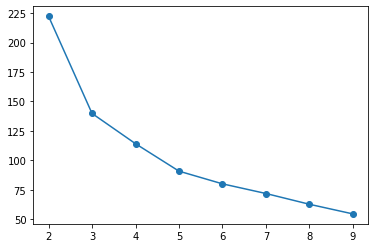

In [15]:
plt.plot(kvals,inertia_vals,marker="o",linestyle="-")

Looks like an elbow (shift in slope) at k=3,  not surprisingly for this data set


There is another way to estimate the optimal k value,  this is using the silhouette score,

The silhouette score for a specimen is   (b-a)/max(a,b)   where a is the mean distance of a specimen to other specimens in the same cluster and b is the mean distance to the individuals in the next closest cluster

The silhouette score varies from +1- well inside the cluster, 0- meaning on the boundary of a cluster to -1 meaning well within another cluster

The mean silhoute score over all specimens is thus a performance measure for the cluster.

In [16]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.45994823920518635

In [17]:
sil_vals=np.zeros(kvals.shape)
for index,k in enumerate(kvals):
    kmeans_it=KMeans(n_clusters=k)
    kmeans_it.fit(X)
    sil_vals[index]=silhouette_score(X, kmeans_it.labels_)

In [18]:
sil_vals


array([0.58175005, 0.45994824, 0.3882201 , 0.3402524 , 0.32203661,
       0.32562869, 0.34104238, 0.32970978])

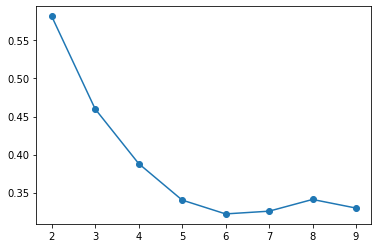

In [19]:
plt.plot(kvals,sil_vals,marker="o",linestyle="-")

Interesting

Note that k=2 performs very well here,  high silhouette scores are good

## Image Segmentation

We will segment images by color range

In [20]:
 # local upload
 
 from matplotlib.image import imread  # or `from imageio import imread`

infile="C:\\Users\\hdavi\\Dropbox\\Data_Analytics\\DAT_514_Machine_Learning\\Example_data\\Cat_flower_picture\\cat_flower.jpg"
    
image = imread(infile)
image.shape

FileNotFoundError: ignored

In [21]:
# upload in Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
 from matplotlib.image import imread  # or `from imageio import imread`

infile="/content/drive/MyDrive/DAT514_Data/cat_flower.jpg"
    
image = imread(infile)
image.shape

(183, 275, 3)

This is a 183 by 275 image,   with 3 color channels (R,G,B),  height is 183,  width is 275

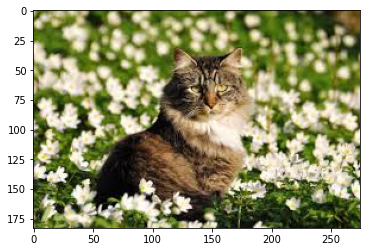

In [23]:
import matplotlib.image as mim
plt.imshow(image)

In [24]:
# Segment the image to 8 colors,  replace the color of each image by the cluster center color correspoinding to the label
# The effect is to reduce the image to k distinct colors

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)





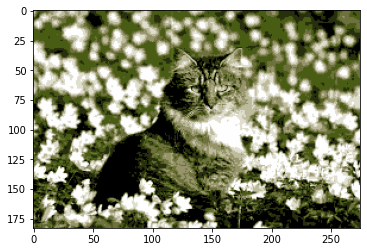

In [25]:
from sklearn.preprocessing import MinMaxScaler

my_mm_scaler=MinMaxScaler((0,1))
segmented_img[:,:,0]=my_mm_scaler.fit_transform(segmented_img[:,:,0])
segmented_img[:,:,1]=my_mm_scaler.fit_transform(segmented_img[:,:,1])
segmented_img[:,:,2]=my_mm_scaler.fit_transform(segmented_img[:,:,2])

plt.imshow(segmented_img)


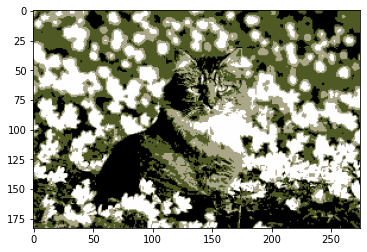

In [26]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=4).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

my_mm_scaler=MinMaxScaler((0,1))
segmented_img[:,:,0]=my_mm_scaler.fit_transform(segmented_img[:,:,0])
segmented_img[:,:,1]=my_mm_scaler.fit_transform(segmented_img[:,:,1])
segmented_img[:,:,2]=my_mm_scaler.fit_transform(segmented_img[:,:,2])

plt.imshow(segmented_img)


In [27]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 3], dtype=int32)

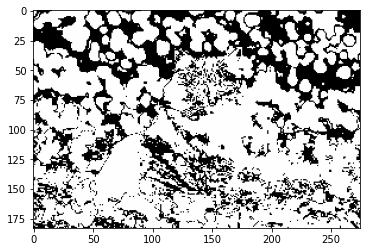

In [28]:

temp=kmeans.labels_.copy()
temp[temp!=1]=0
segmented_img = kmeans.cluster_centers_[temp]
segmented_img = segmented_img.reshape(image.shape)

my_mm_scaler=MinMaxScaler()
segmented_img[:,:,0]=my_mm_scaler.fit_transform(segmented_img[:,:,0])
segmented_img[:,:,1]=my_mm_scaler.fit_transform(segmented_img[:,:,1])
segmented_img[:,:,2]=my_mm_scaler.fit_transform(segmented_img[:,:,2])

plt.imshow(segmented_img)

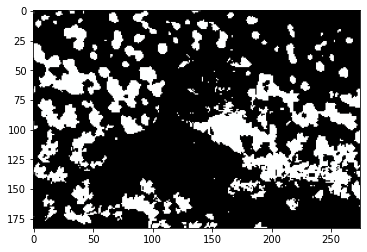

In [29]:
temp=kmeans.labels_.copy()
temp[temp!=2]=0
segmented_img = kmeans.cluster_centers_[temp]
segmented_img = segmented_img.reshape(image.shape)

my_mm_scaler=MinMaxScaler()
segmented_img[:,:,0]=my_mm_scaler.fit_transform(segmented_img[:,:,0])
segmented_img[:,:,1]=my_mm_scaler.fit_transform(segmented_img[:,:,1])
segmented_img[:,:,2]=my_mm_scaler.fit_transform(segmented_img[:,:,2])

plt.imshow(segmented_img)

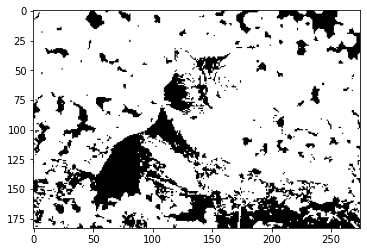

In [30]:
temp=kmeans.labels_.copy()
temp[temp!=3]=0
segmented_img = kmeans.cluster_centers_[temp]
segmented_img = segmented_img.reshape(image.shape)

my_mm_scaler=MinMaxScaler()
segmented_img[:,:,0]=my_mm_scaler.fit_transform(segmented_img[:,:,0])
segmented_img[:,:,1]=my_mm_scaler.fit_transform(segmented_img[:,:,1])
segmented_img[:,:,2]=my_mm_scaler.fit_transform(segmented_img[:,:,2])

plt.imshow(segmented_img)

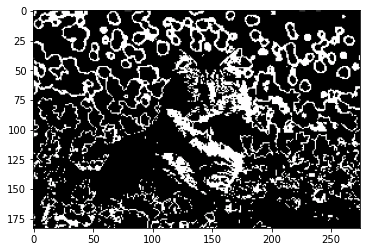

In [31]:
temp=kmeans.labels_.copy()
temp[temp!=0]=1
segmented_img = kmeans.cluster_centers_[temp]
segmented_img = segmented_img.reshape(image.shape)

my_mm_scaler=MinMaxScaler()
segmented_img[:,:,0]=my_mm_scaler.fit_transform(segmented_img[:,:,0])
segmented_img[:,:,1]=my_mm_scaler.fit_transform(segmented_img[:,:,1])
segmented_img[:,:,2]=my_mm_scaler.fit_transform(segmented_img[:,:,2])

plt.imshow(segmented_img)

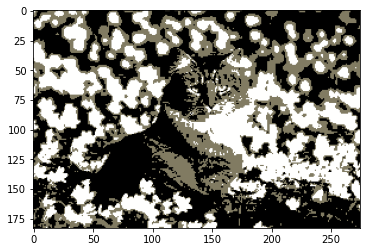

In [32]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=3).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

my_mm_scaler=MinMaxScaler((0,1))
segmented_img[:,:,0]=my_mm_scaler.fit_transform(segmented_img[:,:,0])
segmented_img[:,:,1]=my_mm_scaler.fit_transform(segmented_img[:,:,1])
segmented_img[:,:,2]=my_mm_scaler.fit_transform(segmented_img[:,:,2])

plt.imshow(segmented_img)